In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install os
!pip install seaborn
!pip install pandas-profiling

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
ydata-profiling 4.8.3 requires visions[type_image_path]<0.7.7,>=0.7.5, but you have visions 0.7.4 which is incompatible.
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


  Using cached joblib-1.1.1-py2.py3-none-any.whl.metadata (5.2 kB)
Using cached joblib-1.1.1-py2.py3-none-any.whl (309 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.2
    Uninstalling joblib-1.4.2:
      Successfully uninstalled joblib-1.4.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.4.2 requires joblib>=1.2.0, but you have joblib 1.1.1 which is incompatible.
ydata-profiling 4.8.3 requires visions[type_image_path]<0.7.7,>=0.7.5, but you have visions 0.7.4 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

In [5]:
import os
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [6]:
sales = pd.read_csv('Train.csv')
display(sales)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [7]:
sales.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
sales.duplicated().sum()

0

In [9]:
sales.isnull().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [10]:
sales['Item_Identifier'].value_counts().count()

1559

In [11]:
sales['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [12]:
sales['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [13]:
sales['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [14]:
sales['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [15]:
sales = sales.drop('Item_Identifier',axis=1)
sales = sales.drop('Outlet_Identifier',axis=1)

In [16]:
value_counts = sales['Item_Type'].value_counts()
uncommon_categories = value_counts[value_counts < 400].index

In [17]:
sales['Item_Type'] = sales['Item_Type'].apply(lambda x: 'Others' if x in uncommon_categories else x)

In [18]:
sales.sample(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5481,12.150,Low Fat,0.029583,Household,114.7150,2002,NaN,Tier 2,Supermarket Type1,1048.6350
4914,18.250,Regular,0.183142,Dairy,110.3570,1987,High,Tier 3,Supermarket Type1,2087.2830
6855,NaN,Regular,0.106971,Meat,44.7744,1985,Small,Tier 1,Grocery Store,135.8232
5941,8.905,Low Fat,0.143010,Frozen Foods,61.6878,1987,High,Tier 3,Supermarket Type1,1029.9926
6156,13.000,Low Fat,0.041790,Household,256.1014,1987,High,Tier 3,Supermarket Type1,2550.0140
4077,17.500,Low Fat,0.052741,Snack Foods,103.7990,2007,NaN,Tier 2,Supermarket Type1,1135.1890
7380,NaN,Low Fat,0.012592,Household,123.3414,1985,Medium,Tier 3,Supermarket Type3,4751.8146
4298,NaN,Regular,0.052791,Baking Goods,98.5384,1985,Small,Tier 1,Grocery Store,591.2304
930,13.350,Low Fat,0.032231,Meat,61.4194,1999,Medium,Tier 1,Supermarket Type1,743.0328
4091,17.700,Low Fat,0.012593,Household,167.6474,2009,Medium,Tier 3,Supermarket Type2,3874.2902


In [19]:
sales['Item_Fat_Content'] = sales['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})

In [20]:
sales['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

<Axes: xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

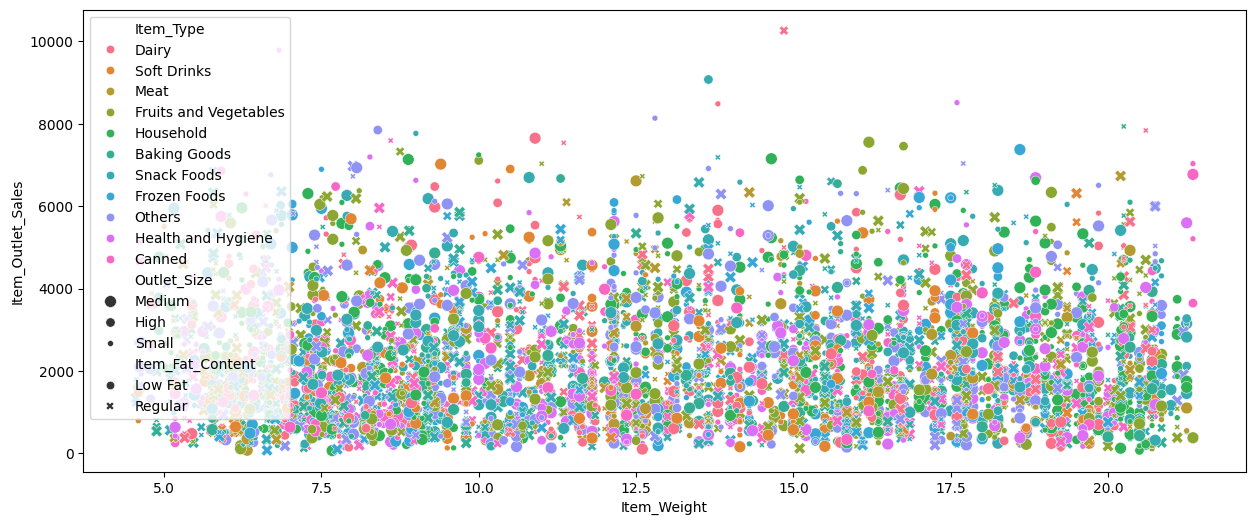

In [21]:
sns.scatterplot(x=sales['Item_Weight'], y=sales['Item_Outlet_Sales'],hue = sales['Item_Type'],style = sales['Item_Fat_Content'],size=sales['Outlet_Size'])

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

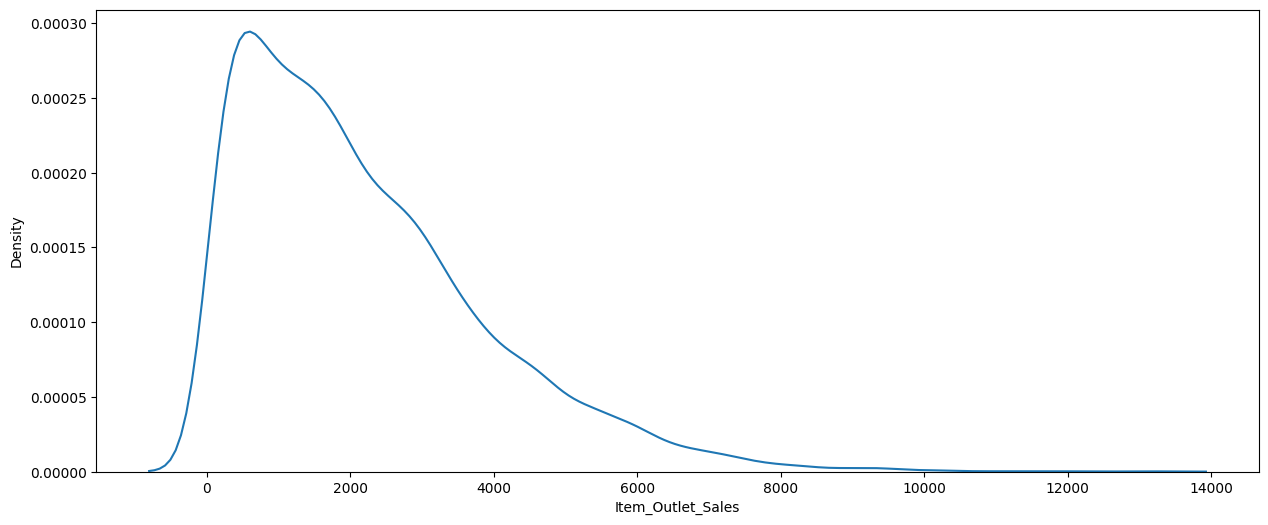

In [22]:
sns.kdeplot(sales['Item_Outlet_Sales'])

In [23]:
sales_numerical = sales.select_dtypes(include=['number'])
sales_categorical = sales.select_dtypes(include=['object'])

<Axes: xlabel='Item_Weight', ylabel='Density'>

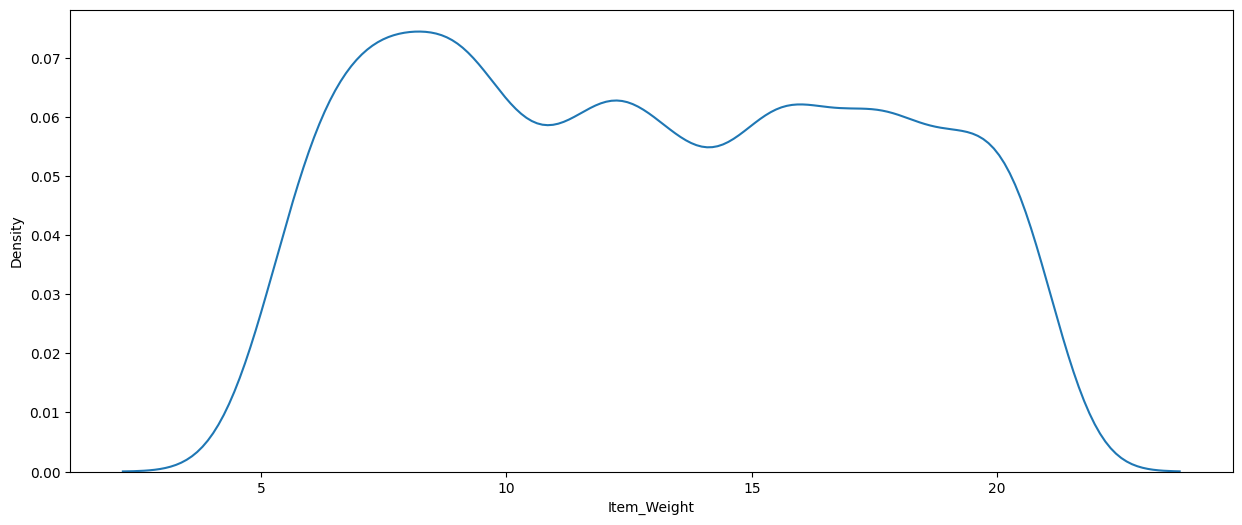

In [24]:
sns.kdeplot(sales['Item_Weight'])

<Axes: xlabel='Item_Visibility', ylabel='Density'>

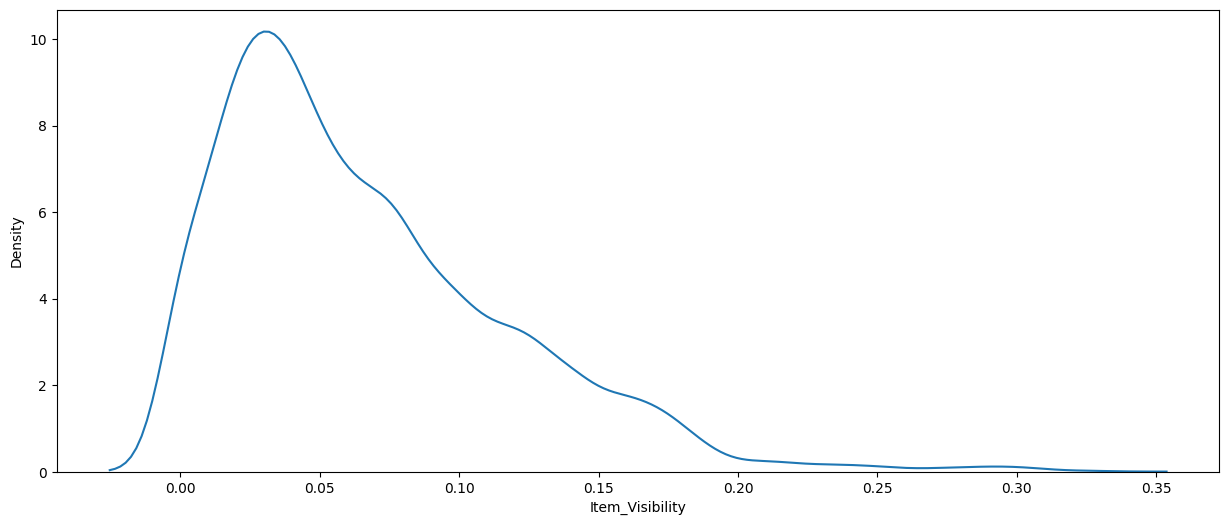

In [25]:
sns.kdeplot(sales['Item_Visibility'])

<Axes: xlabel='Item_MRP', ylabel='Density'>

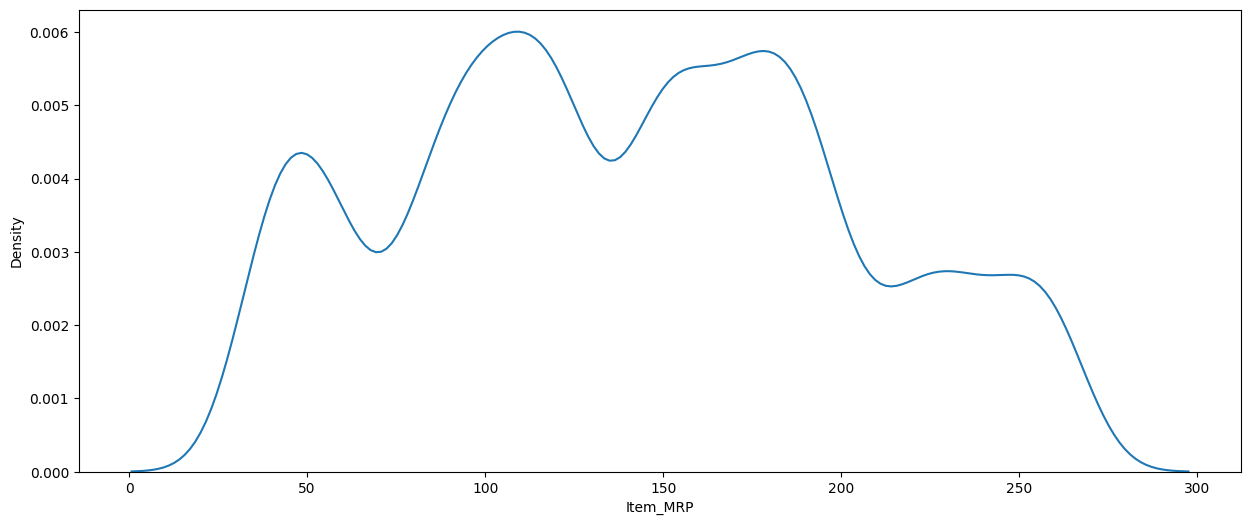

In [26]:
sns.kdeplot(sales['Item_MRP'])

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Density'>

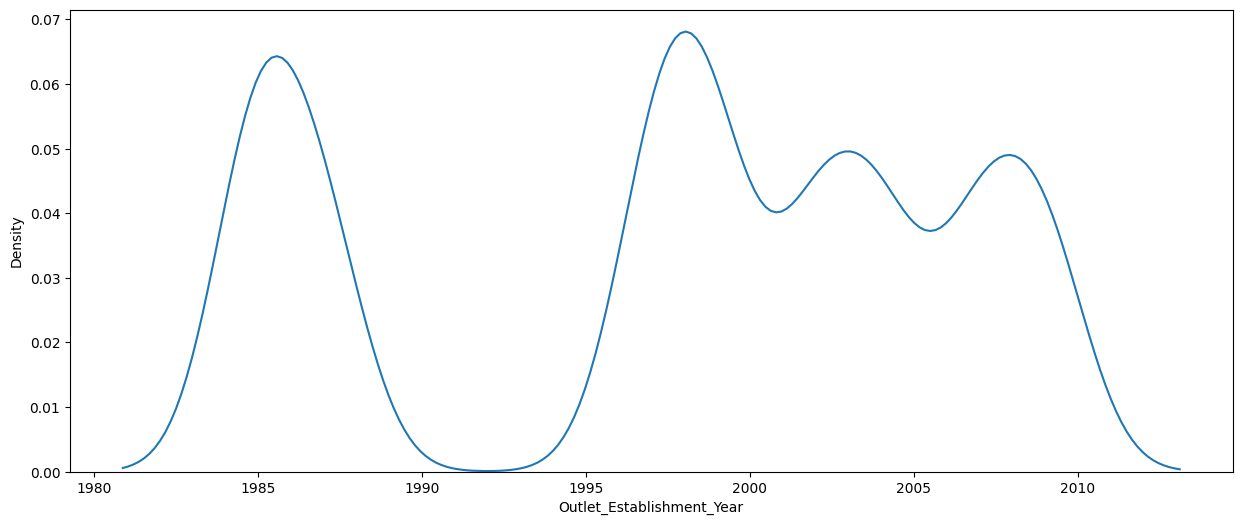

In [27]:
sns.kdeplot(sales['Outlet_Establishment_Year'])

In [35]:
sales.shape

(8523, 10)

In [28]:
corr = sales_numerical.corr()
display (corr)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


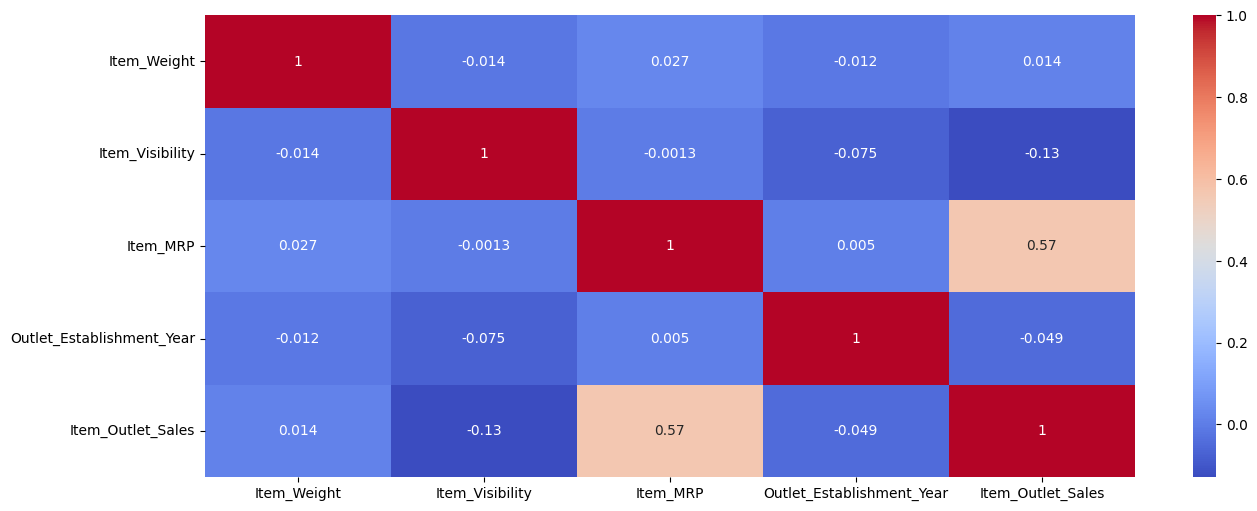

In [29]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [30]:
pd.crosstab(sales['Outlet_Location_Type'],sales['Item_Type'])

Item_Type,Baking Goods,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Health and Hygiene,Household,Meat,Others,Snack Foods,Soft Drinks
Outlet_Location_Type,,,,,,,,,,,
Tier 1,185,177,205,250,337,138,250,123,269,334,120
Tier 2,211,222,214,279,399,166,296,125,315,401,157
Tier 3,252,250,263,327,496,216,364,177,372,465,168


In [31]:
sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [34]:
sales.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [43]:
X = sales.iloc[:, :-1]
Y = sales.iloc[:, -1]  
X

,0,1,2,3,4,5,6,7,8
0,9.3,1999,Medium,Low Fat,0.016047,Dairy,249.8092,Tier 1,Supermarket Type1
1,5.92,2009,Medium,Regular,0.019278,Soft Drinks,48.2692,Tier 3,Supermarket Type2
2,17.5,1999,Medium,Low Fat,0.01676,Meat,141.618,Tier 1,Supermarket Type1
3,19.2,1998,Medium,Regular,0.0,Fruits and Vegetables,182.095,Tier 3,Grocery Store
4,8.93,1987,High,Low Fat,0.0,Household,53.8614,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...
8518,6.865,1987,High,Low Fat,0.056783,Snack Foods,214.5218,Tier 3,Supermarket Type1
8519,8.38,2002,Medium,Regular,0.046982,Baking Goods,108.157,Tier 2,Supermarket Type1
8520,10.6,2004,Small,Low Fat,0.035186,Health and Hygiene,85.1224,Tier 2,Supermarket Type1
8521,7.21,2009,Medium,Regular,0.145221,Snack Foods,103.1332,Tier 3,Supermarket Type2


In [44]:
Y

0        3735.138
1        443.4228
2         2097.27
3          732.38
4        994.7052
          ...    
8518    2778.3834
8519      549.285
8520    1193.1136
8521    1845.5976
8522       765.67
Name: 9, Length: 8523, dtype: object

In [45]:
X = X.values

In [46]:
Y = Y.values

In [47]:
X.shape

(8523, 9)

In [48]:
Y.shape

(8523,)

In [63]:
from sklearn.model_selection import train_test_split
(X_train,X_test,Y_train,Y_test) = train_test_split(X,Y,test_size=0.2,random_state=20)
print (X.shape, Y.shape)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(8523, 9) (8523,)
(6818, 9) (6818,)
(1705, 9) (1705,)


In [64]:
imputer2 = SimpleImputer(strategy='mean')

imputer = SimpleImputer(strategy='most_frequent')

In [65]:
trf = ColumnTransformer([
    ('imputer1',imputer2,[0]),
    ('imputer',imputer,[6])
],remainder='passthrough')

In [66]:
X_train = trf.fit_transform(X_train)
X_test = trf.fit_transform(X_test)
print(X_train.shape)
print(X_test.shape)

(6818, 9)
(1705, 9)


In [67]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8
0,14.85,157.563,1998,Medium,Regular,0.016635,Snack Foods,Tier 3,Grocery Store
1,12.857645,180.5976,1985,Medium,Low Fat,0.03381,Canned,Tier 3,Supermarket Type3
2,17.7,95.541,1998,Medium,Low Fat,0.019438,Frozen Foods,Tier 3,Grocery Store
3,14.5,159.9604,2007,Medium,Low Fat,0.090286,Health and Hygiene,Tier 2,Supermarket Type1
4,11.1,159.0604,1998,Medium,Low Fat,0.294949,Baking Goods,Tier 3,Grocery Store
...,...,...,...,...,...,...,...,...,...
6813,8.895,209.0296,1987,High,Regular,0.039009,Baking Goods,Tier 3,Supermarket Type1
6814,12.857645,210.9928,1985,Small,Regular,0.040226,Snack Foods,Tier 1,Grocery Store
6815,6.59,121.6098,2002,Medium,Low Fat,0.026238,Household,Tier 2,Supermarket Type1
6816,15.15,149.6708,1998,Medium,Low Fat,0.046497,Baking Goods,Tier 3,Grocery Store


In [69]:
tren = ColumnTransformer(transformers = 
                        [('ohe',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore',dtype=np.int32),[6])]
                         ,remainder='passthrough')

In [70]:
X_train = tren.fit_transform(X_train)
X_test = tren.fit_transform(X_test)
print(X_train.shape)
print(X_test.shape)

(6818, 18)
(1705, 18)


In [71]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,1,0,14.85,157.563,1998,Medium,Regular,0.016635,Tier 3,Grocery Store
1,1,0,0,0,0,0,0,0,0,0,12.857645,180.5976,1985,Medium,Low Fat,0.03381,Tier 3,Supermarket Type3
2,0,0,1,0,0,0,0,0,0,0,17.7,95.541,1998,Medium,Low Fat,0.019438,Tier 3,Grocery Store
3,0,0,0,0,1,0,0,0,0,0,14.5,159.9604,2007,Medium,Low Fat,0.090286,Tier 2,Supermarket Type1
4,0,0,0,0,0,0,0,0,0,0,11.1,159.0604,1998,Medium,Low Fat,0.294949,Tier 3,Grocery Store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,0,0,0,0,0,0,0,0,0,0,8.895,209.0296,1987,High,Regular,0.039009,Tier 3,Supermarket Type1
6814,0,0,0,0,0,0,0,0,1,0,12.857645,210.9928,1985,Small,Regular,0.040226,Tier 1,Grocery Store
6815,0,0,0,0,0,1,0,0,0,0,6.59,121.6098,2002,Medium,Low Fat,0.026238,Tier 2,Supermarket Type1
6816,0,0,0,0,0,0,0,0,0,0,15.15,149.6708,1998,Medium,Low Fat,0.046497,Tier 3,Grocery Store


In [74]:
ordinal = ColumnTransformer(transformers=[
    ('tnf2', OrdinalEncoder(categories=[['Low Fat', 'Regular']]), [14]),
    ('tnf3', OrdinalEncoder(categories=[['Small', 'Medium', 'High']]), [13]),
    ('tnf4', OrdinalEncoder(categories=[['Tier 1', 'Tier 2', 'Tier 3']]), [16]),
    ('tnf5', OrdinalEncoder(categories=[['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']]), [17]),
    ('tnf6', OneHotEncoder(categories='auto',sparse_output=False, drop='first'), [3])
], remainder='passthrough')

In [75]:
X_train = ordinal.fit_transform(X_train)
X_test = ordinal.fit_transform(X_test)
print(X_train.shape)
print(X_test.shape)

(6818, 18)
(1705, 18)


In [78]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.0,1.0,2.0,0.0,0.0,0,0,0,0,0,0,0,1,0,14.85,157.563,1998,0.016635
1,0.0,1.0,2.0,3.0,0.0,1,0,0,0,0,0,0,0,0,12.857645,180.5976,1985,0.03381
2,0.0,1.0,2.0,0.0,0.0,0,0,1,0,0,0,0,0,0,17.7,95.541,1998,0.019438
3,0.0,1.0,1.0,1.0,0.0,0,0,0,1,0,0,0,0,0,14.5,159.9604,2007,0.090286
4,0.0,1.0,2.0,0.0,0.0,0,0,0,0,0,0,0,0,0,11.1,159.0604,1998,0.294949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,1.0,2.0,2.0,1.0,0.0,0,0,0,0,0,0,0,0,0,8.895,209.0296,1987,0.039009
6814,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,12.857645,210.9928,1985,0.040226
6815,0.0,1.0,1.0,1.0,0.0,0,0,0,0,1,0,0,0,0,6.59,121.6098,2002,0.026238
6816,0.0,1.0,2.0,0.0,0.0,0,0,0,0,0,0,0,0,0,15.15,149.6708,1998,0.046497


In [76]:
from sklearn import metrics 
display (",   ".join(metrics.get_scorer_names()))


'accuracy,   adjusted_mutual_info_score,   adjusted_rand_score,   average_precision,   balanced_accuracy,   completeness_score,   explained_variance,   f1,   f1_macro,   f1_micro,   f1_samples,   f1_weighted,   fowlkes_mallows_score,   homogeneity_score,   jaccard,   jaccard_macro,   jaccard_micro,   jaccard_samples,   jaccard_weighted,   matthews_corrcoef,   max_error,   mutual_info_score,   neg_brier_score,   neg_log_loss,   neg_mean_absolute_error,   neg_mean_absolute_percentage_error,   neg_mean_gamma_deviance,   neg_mean_poisson_deviance,   neg_mean_squared_error,   neg_mean_squared_log_error,   neg_median_absolute_error,   neg_negative_likelihood_ratio,   neg_root_mean_squared_error,   neg_root_mean_squared_log_error,   normalized_mutual_info_score,   positive_likelihood_ratio,   precision,   precision_macro,   precision_micro,   precision_samples,   precision_weighted,   r2,   rand_score,   recall,   recall_macro,   recall_micro,   recall_samples,   recall_weighted,   roc_auc,  

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def train(model, X, y):
    # training the model
    model.fit(X, y)
    
    pred = model.predict(X)
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    print("Model Report")
    print ('Scoring - neg_mean_squared_error')
    print ( cv_score )    
    cv_score = np.abs(np.mean(cv_score))    
    print ('ABS Average of - neg_mean_squared_error',cv_score )       
    cv_score = cross_val_score(model, X, y,  cv=5)
    print ()
    print ('R2 Score ')
    print ( cv_score )    
    cv_score = np.mean(cv_score)     
    print ('Average R2 Score ',cv_score)    
    print ()
    print ('Accuracy for full Data')
    print('R2_Score:', r2_score(y,pred))
    print ()


Model Report
Scoring - neg_mean_squared_error
[-1516904.70987933 -1338425.61867259 -1546376.30918845 -1369754.05644966
 -1503611.2830427 ]
ABS Average of - neg_mean_squared_error 1455014.395446546

R2 Score 
[0.47205806 0.51837928 0.51502519 0.50597051 0.50359191]
Average R2 Score  0.5030049907307528

Accuracy for full Data
R2_Score: 0.5060713807628137

17   -1252.252104
2     -424.381096
8      -47.053906
6      -35.139109
7       -7.736637
13      -2.298807
12      -2.186860
14      -1.992726
16       1.579070
10       5.113481
9        6.608995
15      15.733586
11      26.404208
0       35.287848
5       48.590590
4       87.914448
1      337.142231
3     1000.128851
dtype: float64


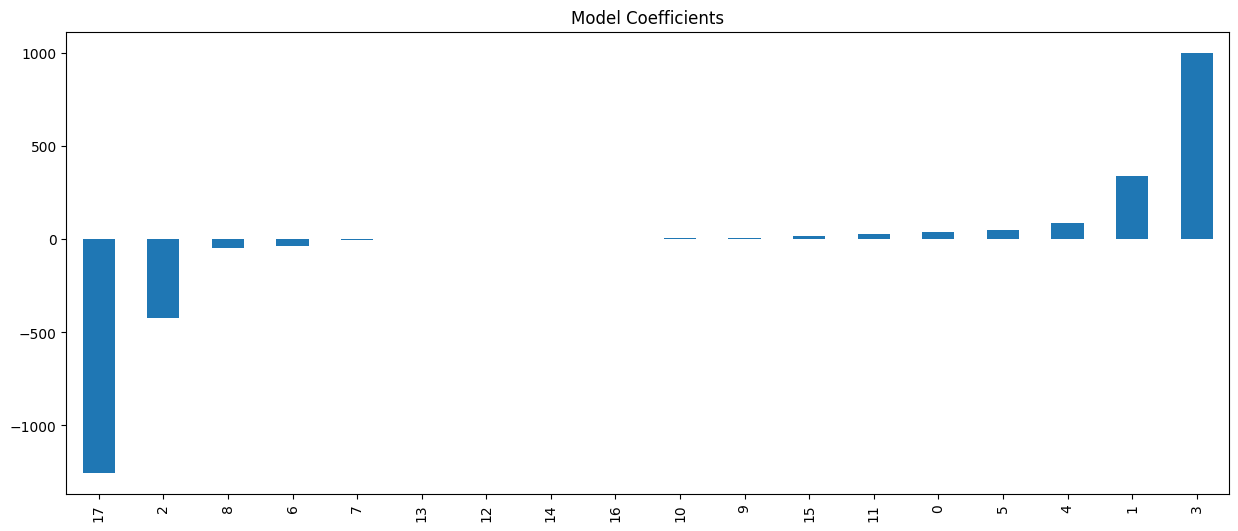

In [89]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression()
train(model, X_train, Y_train)
coef = pd.Series(model.coef_).sort_values()
print (coef)
coef.plot(kind='bar', title="Model Coefficients")
plt.show()


Model Report
Scoring - neg_mean_squared_error
[-1517067.39535907 -1338297.67440541 -1546372.21594334 -1369768.79636951
 -1503483.57616159]
ABS Average of - neg_mean_squared_error 1454997.9316477831

R2 Score 
[0.47200143 0.51842532 0.51502647 0.5059652  0.50363407]
Average R2 Score  0.5030105003022977

Accuracy for full Data
R2_Score: 0.5060673392056025



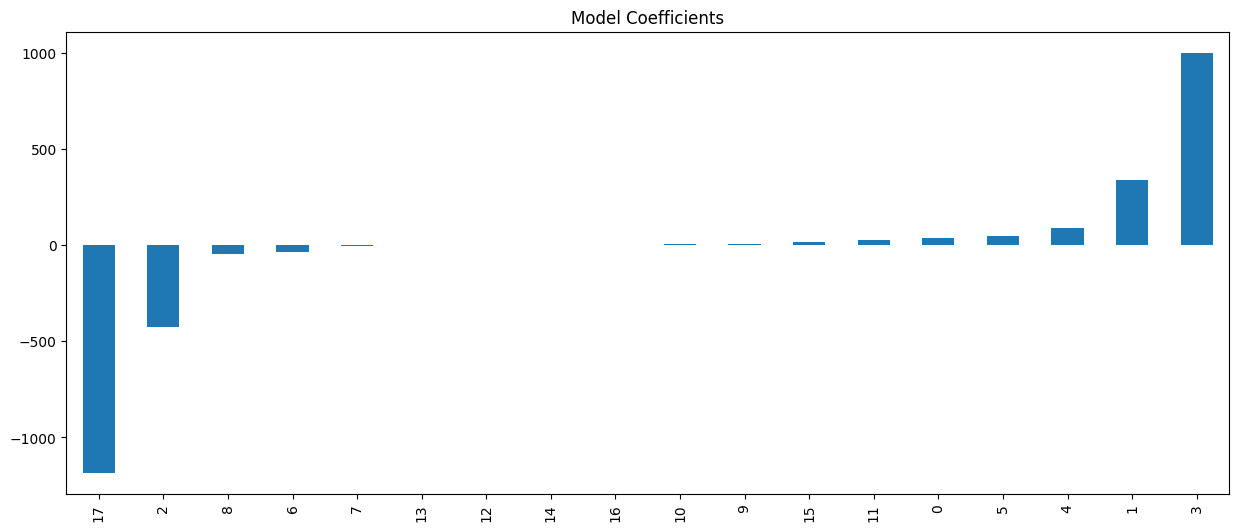

In [92]:
model = Ridge()
train(model, X_train, Y_train)
coef = pd.Series(model.coef_).sort_values()
coef.plot(kind='bar', title="Model Coefficients")
plt.show()


Model Report
Scoring - neg_mean_squared_error
[-1517009.56428236 -1338070.64060855 -1544800.9289819  -1369142.64206184
 -1502815.62497701]
ABS Average of - neg_mean_squared_error 1454367.88018233

R2 Score 
[0.47202156 0.51850702 0.51551926 0.50619103 0.50385459]
Average R2 Score  0.5032186935215026

Accuracy for full Data
R2_Score: 0.5059090631603057



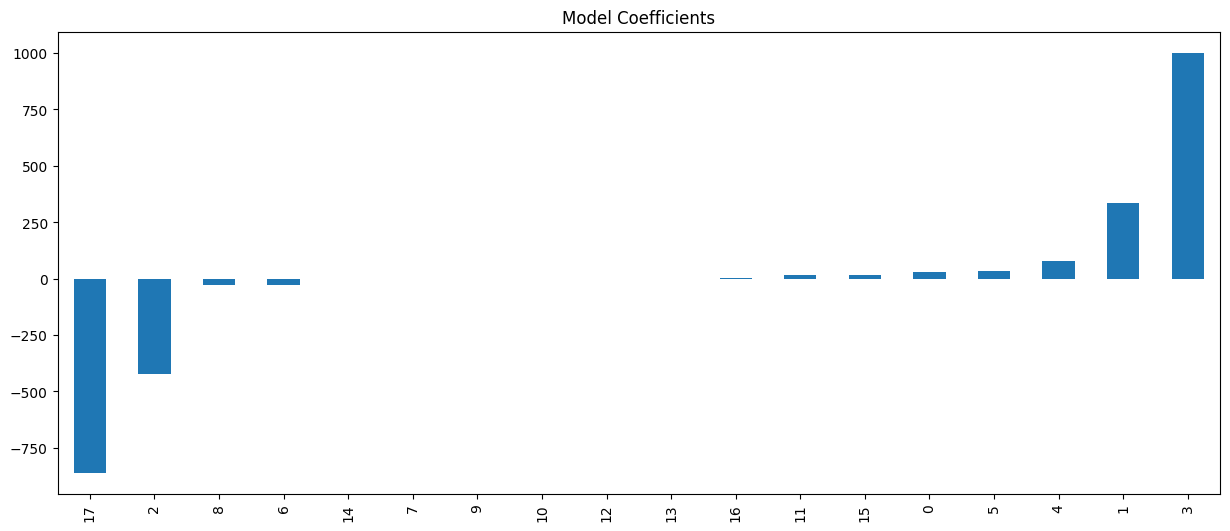

In [94]:
model = Lasso()
train(model, X_train, Y_train)
coef = pd.Series(model.coef_).sort_values()
coef.plot(kind='bar', title="Model Coefficients")
plt.show()


Model Report
Scoring - neg_mean_squared_error
[-2371757.07701904 -2355929.70706614 -2474150.11449458 -2331125.65900302
 -2518930.77008597]
ABS Average of - neg_mean_squared_error 2410378.665533751

R2 Score 
[0.16631778 0.18244978 0.24365304 0.14687527 0.1761629 ]
Average R2 Score  0.18309175387766968

Accuracy for full Data
R2_Score: 1.0



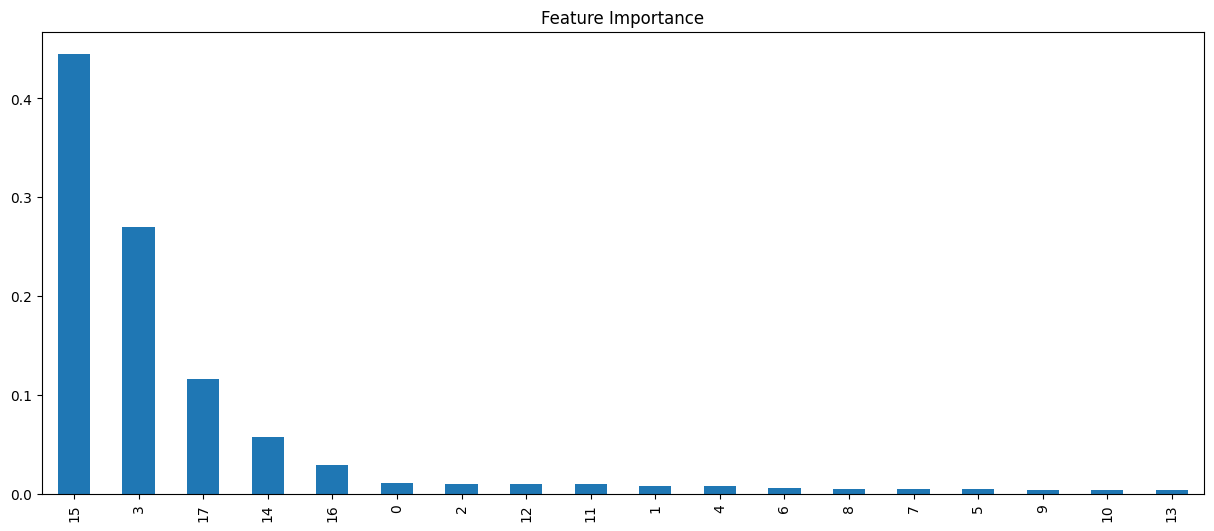

In [95]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model,X_train, Y_train)
coef = pd.Series(model.feature_importances_).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()


Model Report
Scoring - neg_mean_squared_error
[-1471941.24314056 -1369091.80603244 -1539128.86876436 -1451925.54688027
 -1559627.25307945]
ABS Average of - neg_mean_squared_error 1478342.9435794172

R2 Score 
[0.48770709 0.50734432 0.51729813 0.4763337  0.48509858]
Average R2 Score  0.49475636751831475

Accuracy for full Data
R2_Score: 0.8698999163505706



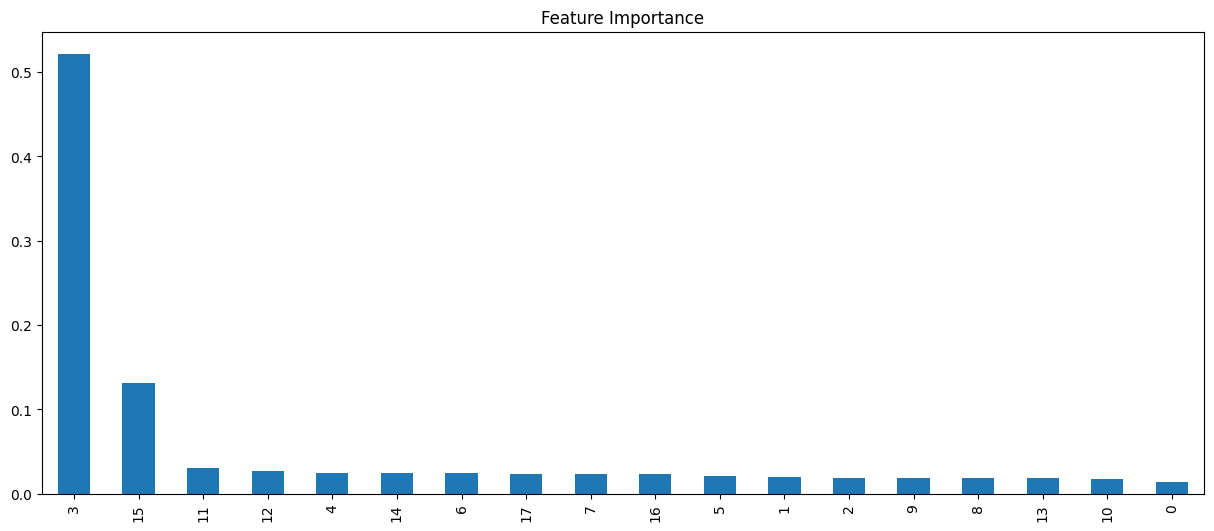

In [126]:
from sklearn.ensemble import RandomForestRegressor
modelR = RandomForestRegressor()
train(model, X_train, Y_train)
coef = pd.Series(model.feature_importances_).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()


Model Report
Scoring - neg_mean_squared_error
[-1569164.34452614 -1331641.29546438 -1559520.27366562 -1414005.98990203
 -1555772.33475071]
ABS Average of - neg_mean_squared_error 1486020.847661774

R2 Score 
[0.45735188 0.52803217 0.50922977 0.49184035 0.47946027]
Average R2 Score  0.4931828887494499

Accuracy for full Data
R2_Score: 0.9999999581451087



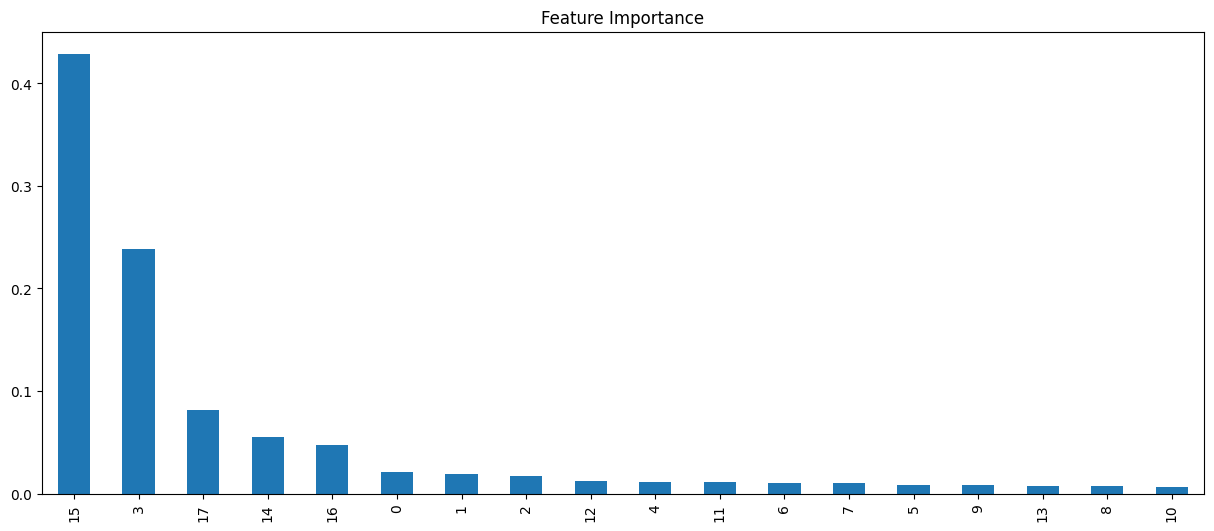

In [98]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X_train, Y_train)
coef = pd.Series(model.feature_importances_).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()


In [100]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.3 MB 762.6 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.3 MB 762.6 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.3 MB 1.1 MB/s eta 0:00:01
   ------------ --------------------------- 0.4/1.3 MB 1.6 MB/s eta 0:00:01
   ------------------ --------------------- 0.6/1.3 MB 2.0 MB/s eta 0:00:01
   ------------------ --------------------- 0.6/1.3 MB 2.0 MB/s eta 0:00:01
   ------------------------ --------------- 0.8/1.3 MB 2.0 MB/s eta 0:00:01
   --------------------------- ------------ 0.9/1.3 MB 2.1 MB/s eta 0:00:01
   --------------------------- ------------ 0.9/1.3 MB 2.1 MB/s eta 0:00:01
   ---------------------------------

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 779
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 18
[LightGBM] [Info] Start training from score 2193.444703
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 779
[LightGBM] [Info] Number of data points in the train set: 5454, number of used features: 18
[LightGBM] [Info] Start training from score 2195.287627
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

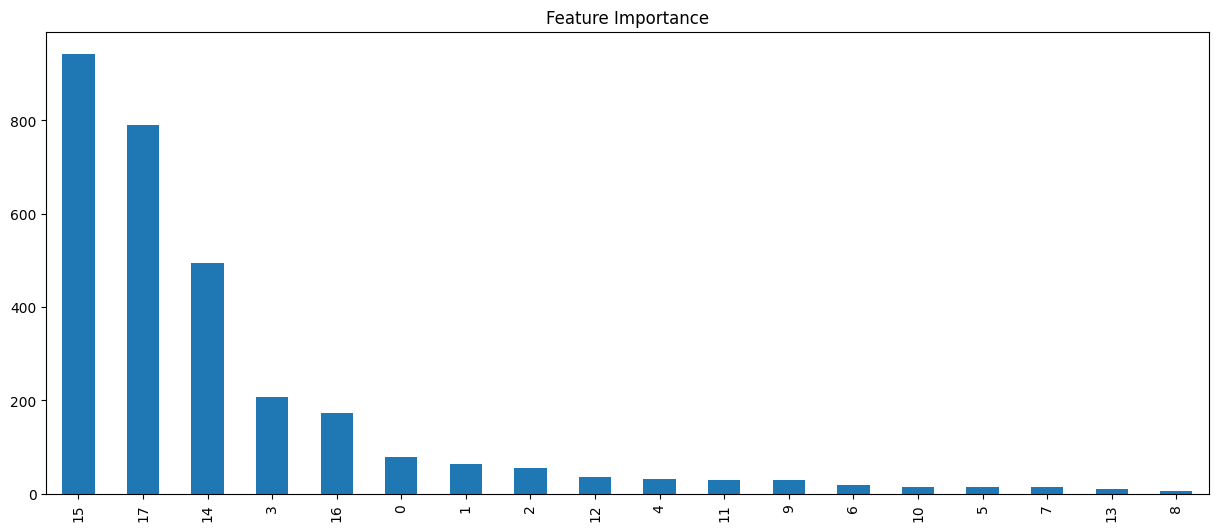

In [101]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
model = LGBMRegressor()
train(model, X_train, Y_train)
coef = pd.Series(model.feature_importances_).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()


In [103]:
!pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 1.3 MB/s eta 0:01:16
   ---------------------------------------- 0.2/99.8 MB 1.8 MB/s eta 0:00:56
   ---------------------------------------- 0.8/99.8 MB 4.9 MB/s eta 0:00:21
   ---------------------------------------- 0.8/99.8 MB 4.2 MB/s eta 0:00:24
   ---------------------------------------- 1.2/99.8 MB 4.3 MB/s eta 0:00:23
   ---------------------------------------- 1.2/99.8 MB 4.3 MB/s eta 0:00:23
    --------------------------------------- 1.5/99.8 MB 4.2 MB/s eta 0:00:24
    --------------------------------------- 1.5/99.8 MB 4.2 MB/s eta 0:00:24
    --------------------------------------- 1.5/99.8 MB 4.2 MB/s eta 0:00:24
    --------------------------------------- 1.9/99.8 MB 3.8 MB/s eta 0:00:26
   - -------------------------------------- 2.5/99.8 MB 4.5 MB/s eta 0:00:22
   - --------

In [104]:
import xgboost as xgb

Model Report
Scoring - neg_mean_squared_error
[-1471941.24314056 -1369091.80603244 -1539128.86876436 -1451925.54688027
 -1559627.25307945]
ABS Average of - neg_mean_squared_error 1478342.9435794172

R2 Score 
[0.48770709 0.50734432 0.51729813 0.4763337  0.48509858]
Average R2 Score  0.49475636751831475

Accuracy for full Data
R2_Score: 0.8698999163505706



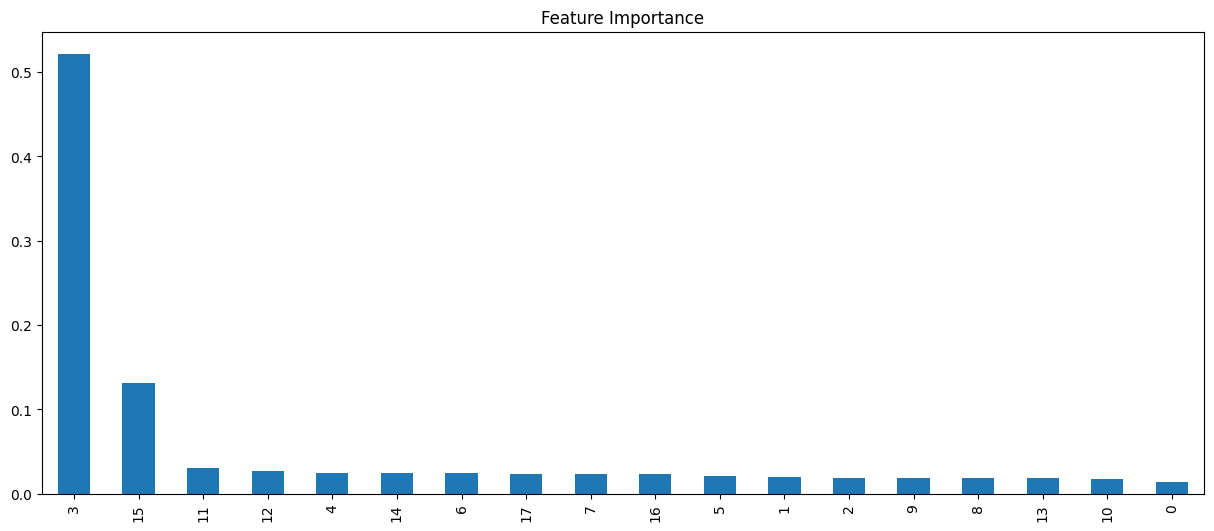

In [105]:
from xgboost import XGBRegressor
model = XGBRegressor()
train(model, X_train, Y_train)
coef = pd.Series(model.feature_importances_).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()


In [106]:
from sklearn.model_selection import RandomizedSearchCV


In [107]:
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
   
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)


{'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [110]:
rf = RandomForestRegressor()
rf=RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)
display (rf.fit(X_train, Y_train))


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [111]:
print(rf.best_params_)
print(rf.best_score_)
predictions=rf.predict(X_test)
display (r2_score (Y_test,predictions))
display (predictions)        


{'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 30}
-1211586.520092743


0.5968665189433153

array([1714.24509295, 4120.31905404,  929.15019353, ..., 3020.8385087 ,
       3394.37025705, 1646.54476064])

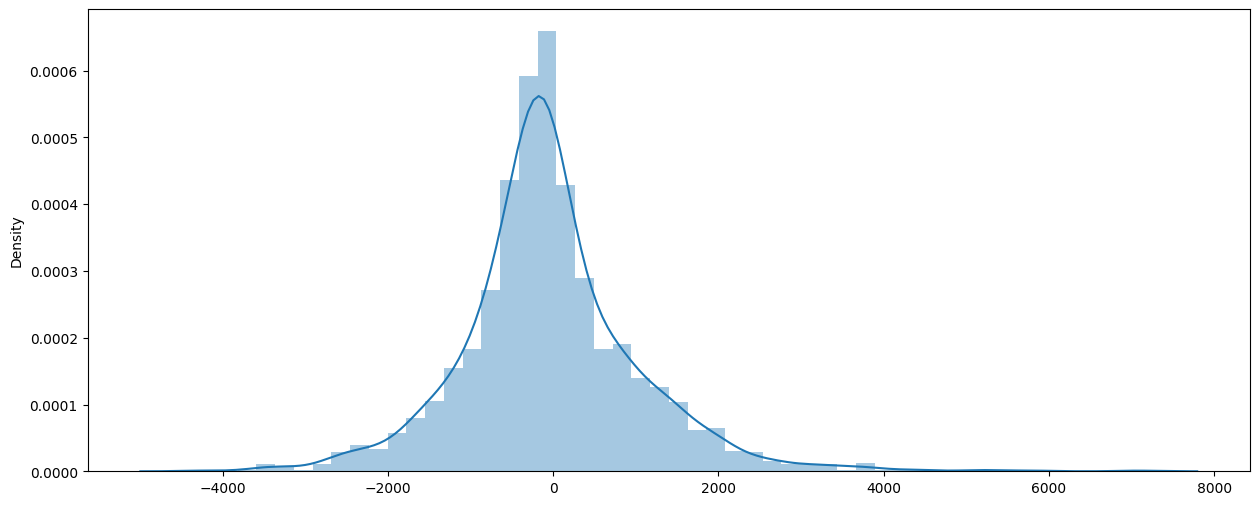

In [113]:
sns.distplot(Y_test-predictions)
plt.show()

In [114]:
from scipy.stats import uniform, randint
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}


In [117]:
lgb=LGBMRegressor()
lgb = RandomizedSearchCV(estimator = lgb, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
lgb.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000283 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 779
[LightGBM] [Info] Number of data points in the train set: 5454, number of used features: 18
[LightGBM] [Info] Start training from score 2195.287627
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=1,
                   param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002353B1F95B0>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002353B019B80>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002353B077860>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000023539F53530>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002353B033CB0>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [118]:
print(lgb.best_params_)
print(lgb.best_score_)
predictions=lgb.predict(X_test)
display (r2_score (Y_test,predictions))
display (predictions) 


{'gamma': 0.22007624686980065, 'learning_rate': 0.06661147045343364, 'max_depth': 2, 'n_estimators': 107, 'subsample': 0.6137554084460873}
-1181514.7471692334
[LightGBM] [Warning] Unknown parameter: gamma


0.6095898570131416

array([1695.17821644, 3901.24166425,  816.68593263, ..., 3138.72003792,
       3163.45130662, 1946.66678945])

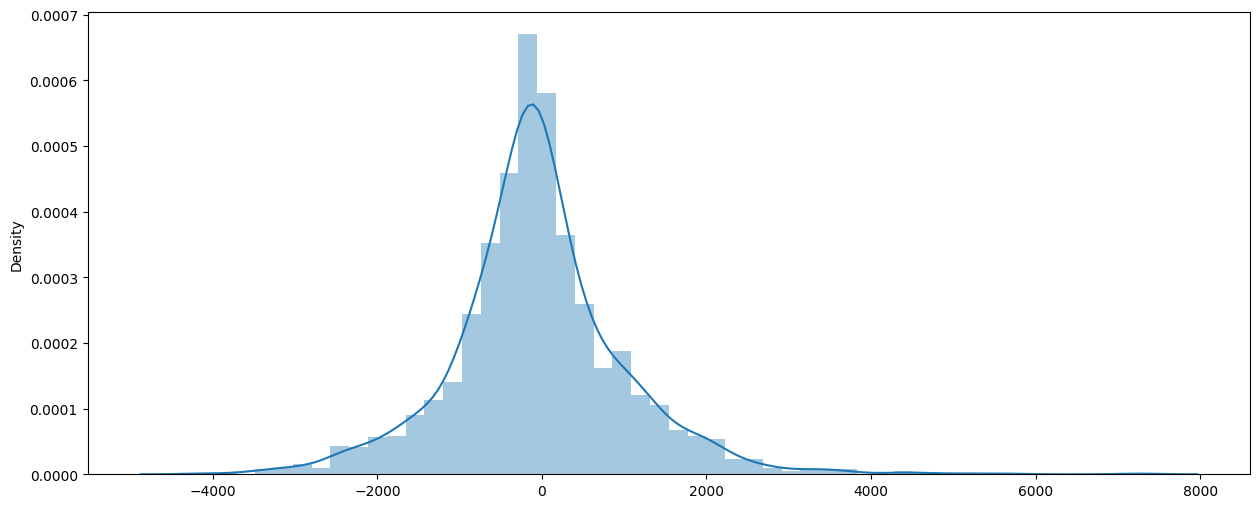

In [119]:
sns.distplot(Y_test-predictions)
plt.show()

In [120]:
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [121]:
xgb = RandomizedSearchCV(estimator = model, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
xgb.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.1s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.1s
[CV] END gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741; total time=   0.0s
[CV] END gamma=0.07800932022121826, le

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002353BE595B0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002353B6B3C50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002353B6F4860>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002353B6F4950>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [122]:
print(xgb.best_params_)
print(xgb.best_score_)
predictions=xgb.predict(X_test)
display (r2_score (Y_test,predictions))
display (predictions)

{'gamma': 0.22007624686980065, 'learning_rate': 0.06661147045343364, 'max_depth': 2, 'n_estimators': 107, 'subsample': 0.6137554084460873}
-1181148.8334852275


0.6099414045325584

array([1613.6405 , 3880.0356 ,  841.39185, ..., 3161.8765 , 3204.2393 ,
       1994.164  ], dtype=float32)

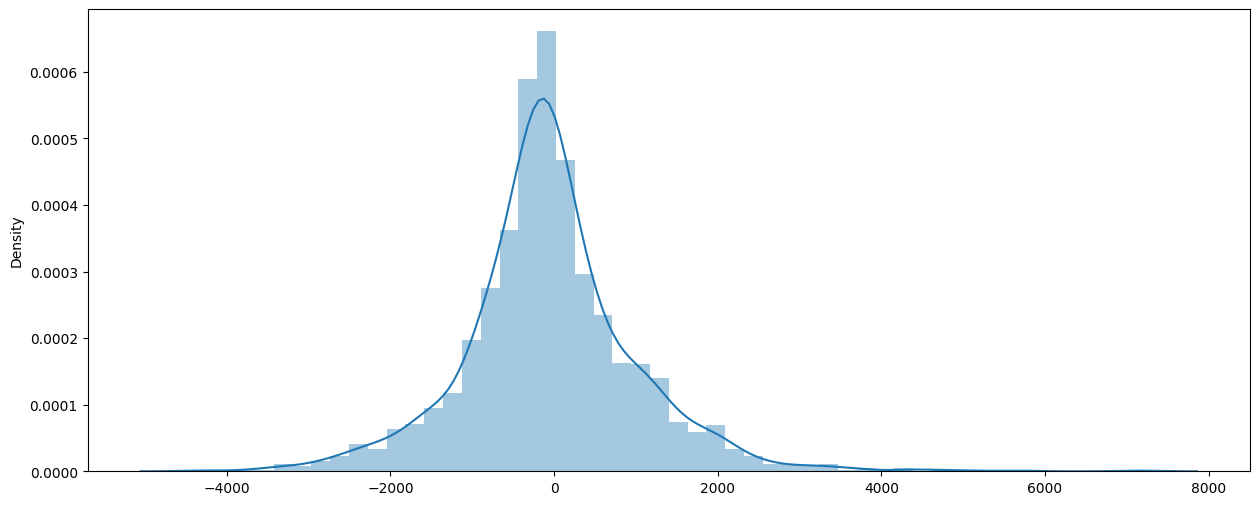

In [124]:
sns.distplot(Y_test-predictions)
plt.show()

In [125]:
import pickle 

In [ ]:
pickle.dump(modelR, open('model2.pkl','wb'))